**Contrasting signatures of genomic divergence in rapidly speciating crater lake cichlid fishes**

Andreas Kautt , Claudius Kratochwil , Alexander Nater , Gonzalo Machado-Schiaffino , Melisa Olave , Frederico Henning , Julian Torres-Dowdall , Andreas Härer , Darrin Hulsey , Paolo Franchini , Martin Pippel , Eugene Myers, Axel Meyer

R-Script for geometric morphometric analysis <br>
Code written between 2018 and 2020 by Melisa Olave, Claudius Kratochwil, and Andi Kautt

Disclaimer: Although we did our best to ensure that this code is correct, we provide it without warranty of any kind. Please contact us if you have questions and report any problems.

## Set up env

### Load libraries

In [1]:
library(geomorph)
library(MASS)
library(Rtsne)
library(scales)
library(plotly)
library(tidyverse)

Loading required package: RRPP
Loading required package: rgl
Warning message:
“'rgl.init' failed, running with 'rgl.useNULL = TRUE'.”Loading required package: ggplot2

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:MASS’:

    select

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.3     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ dplyr   0.8.1
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  2.1.3     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks plotly::filter(), stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ dplyr::select()     masks 

### Load data

In [2]:
setwd("/Users/andreaskautt/Work/Projects/2018_MoM/Data/geomorph")

In [3]:
# read TPS data and pull out IDs
TPS <- readland.tps(file="morphometrics_wgs_qtl.tps", specID="imageID", readcurves=T)
TPS.ids <- TPS %>% dimnames() %>% .[[3]]

# get semilandmarks for file
semiland <- matrix(c(2,3,4,3,4,5,4,5,6,10,11,12,11,12,13,14,15,1),ncol=3,byrow = T)
colnames(semiland)<-c("before","slide","after")

# get sample info and order according to TPS.ids
classifier <- read.csv(file="sample_list_morphometrics.csv", header=T, stringsAsFactors=F, sep=",") %>%
    arrange(factor(Sample_name, levels=TPS.ids))


No curves detected; all points appear to be fixed landmarks.


In [4]:
# check that order is really the same
TPS.ids == classifier$Sample_name

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [91] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[106] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[121] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[136] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[151] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[166] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[181] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[196] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[211] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[226] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[241] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[256] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[271] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[286] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[301] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[316] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[331] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[346] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[361] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[376] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[391] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[406] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[421] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[436] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[451] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[466] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[481] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[496] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[511] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[526] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[541] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[556] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[571] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[586] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[601] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[616] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[631] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[646] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[661] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[676] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[691] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[706] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[721] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[736] TRUE TRUE TRUE TRUE TRUE TR

In [5]:
#color-code
classifier %>% select(Group_short,Color_species) %>% unique()

,Group_short,Color_species
1,Apo_ast,#FF9FB8
24,Apo_cha,#ED1D40
29,Apo_xxx,#FFFFFF
47,Apo_glo,#F97373
63,Apo_fla,#AF5151
90,Apo_sup,#F93A88
100,Apo_zal,#821426
121,AsL_cit,#30D5C8
141,AsM_tol,#FFC901
161,Aye_cit,#FFA500


## Run geomorph

### GPA (general procrustes analysis)

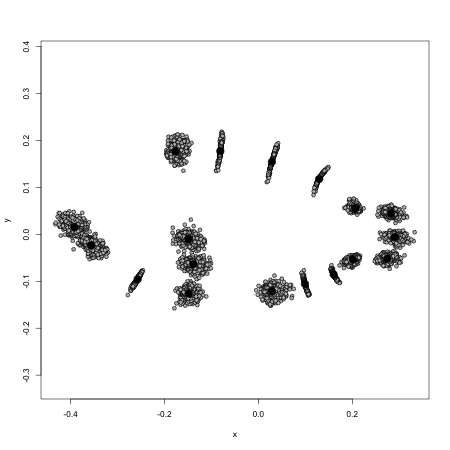

In [6]:
gpa <- gpagen(A=TPS,
              curves = semiland,
              surfaces = NULL, 
              PrinAxes = TRUE,
              max.iter = NULL, 
              ProcD = TRUE,
              Proj = TRUE,
              print.progress = F)

options(repr.plot.height=9,repr.plot.width=9, repr.plot.res=50)
plot(gpa)


PC Summary

Importance of first k=34 (out of 36) components:
                           PC1     PC2     PC3     PC4     PC5      PC6
Standard deviation     0.03259 0.01953 0.01654 0.01488 0.01185 0.009174
Proportion of Variance 0.40623 0.14586 0.10464 0.08473 0.05370 0.032190
Cumulative Proportion  0.40623 0.55209 0.65673 0.74146 0.79515 0.827340
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     0.008239 0.007459 0.006202 0.006144 0.005698 0.005331
Proportion of Variance 0.025970 0.021280 0.014710 0.014440 0.012420 0.010870
Cumulative Proportion  0.853310 0.874590 0.889310 0.903750 0.916160 0.927030
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     0.005204 0.004681 0.004555 0.004229 0.003989 0.003858
Proportion of Variance 0.010360 0.008380 0.007940 0.006840 0.006090 0.005690
Cumulative Proportion  0.937390 0.945770 0.953710 0.960550 0.966640 0.972330
                           PC19   

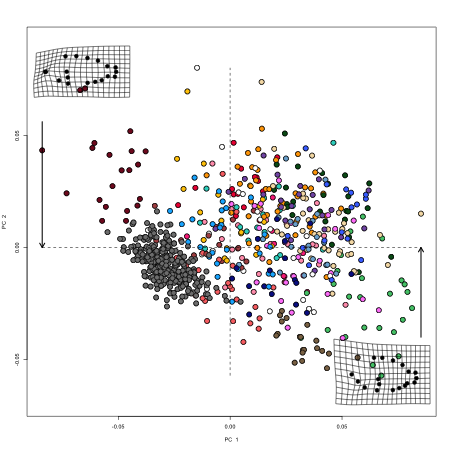

In [7]:
options(repr.plot.height=9,repr.plot.width=9, repr.plot.res=50)
plotTangentSpace(gpa$coords, axis1=1, axis2=2, warpgrids=T, mesh=NULL, label= , groups=classifier$Color_species)

### Account for size differences

In [8]:
gdf <- geomorph.data.frame(gpa, Sample_name=classifier$Sample_name, Group_short=classifier$Group_short,
                           Color_species=classifier$Color_species)

In [9]:
# calculate SL (standard length) and add to gdf
SL.LMs <- matrix(c(1,8), ncol=2, byrow=T, dimnames=list(c("SL"),c("start", "end")))
gdf$SL <- interlmkdist(TPS, SL.LMs)


	Pearson's product-moment correlation

data:  gdf$Csize and gdf$SL
t = 348.66, df = 759, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9964182 0.9973046
sample estimates:
      cor 
0.9968928 


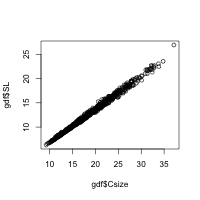

In [10]:
# check correlation of Csize (centroid size) and SL
cor.test(gdf$Csize,gdf$SL)

options(repr.plot.height=4,repr.plot.width=4, repr.plot.res=50)
plot(gdf$Csize,gdf$SL)

In [11]:
size_test <- procD.lm(coords~SL, data=gdf, iter=499)


Preliminary Model Fit...
  |======================================================================| 100%

Coefficients estimation: 500 permutations.
  |======================================================================| 100%

Sums of Squares calculations: 500 permutations.
  |======================================================================| 100%


In [12]:
anova(size_test)


Analysis of Variance, using Residual Randomization
Permutation procedure: Randomization of null model residuals 
Number of permutations: 500 
Estimation method: Ordinary Least Squares 
Sums of Squares and Cross-products: Type I 
Effect sizes (Z) based on F distributions

           Df      SS       MS     Rsq      F      Z Pr(>F)   
SL          1 0.21018 0.210176 0.10579 89.791 7.4903  0.002 **
Residuals 759 1.77662 0.002341 0.89421                        
Total     760 1.98680                                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call: procD.lm(f1 = coords ~ SL, iter = 499, data = gdf)

In [13]:
# save size-adjusted residuals as 3D array
shape.resid <- arrayspecs(size_test$residuals, p=dim(gpa$coords)[1], k=dim(gpa$coords)[2])

# make new geomorph DF
adj.shape <- shape.resid + array(gpa$consensus, dim(shape.resid))
adj.gdf <- geomorph.data.frame(coords=adj.shape, Sample_name=classifier$Sample_name, Group_short=classifier$Group_short,
                           Color_species=classifier$Color_species)


PC Summary

Importance of first k=34 (out of 36) components:
                           PC1     PC2     PC3     PC4     PC5      PC6
Standard deviation     0.02911 0.01947 0.01654 0.01361 0.01144 0.009165
Proportion of Variance 0.36261 0.16211 0.11697 0.07925 0.05595 0.035930
Cumulative Proportion  0.36261 0.52472 0.64169 0.72094 0.77689 0.812820
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     0.008174 0.007207 0.006158 0.006094 0.005414 0.005312
Proportion of Variance 0.028580 0.022220 0.016220 0.015880 0.012540 0.012070
Cumulative Proportion  0.841400 0.863620 0.879840 0.895730 0.908260 0.920330
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     0.005169 0.004665 0.004499 0.004189 0.003891 0.003696
Proportion of Variance 0.011430 0.009310 0.008660 0.007510 0.006480 0.005840
Cumulative Proportion  0.931760 0.941070 0.949730 0.957240 0.963720 0.969560
                           PC19   

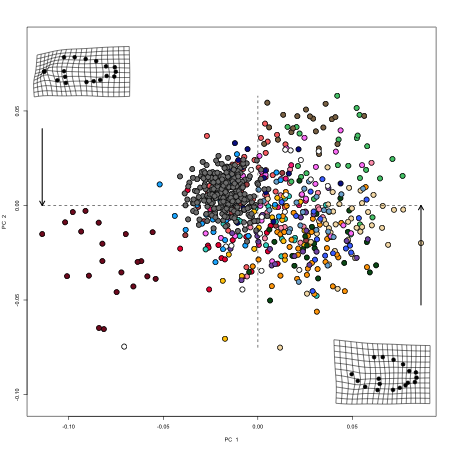

In [14]:
options(repr.plot.height=9,repr.plot.width=9, repr.plot.res=50)
plotTangentSpace(adj.gdf$coords, axis1=1, axis2=2, warpgrids=T, mesh=NULL, label= , groups=classifier$Color_species)

### Perform PCA just with WGS data and project QTL onto that space

In [15]:
# convert into 2d-array
adj.gdf.2d <- data.frame(coord=two.d.array(adj.gdf$coords)) %>% rownames_to_column("Sample_name")

In [16]:
# add samples info
WGS_and_QTL <- full_join(classifier,adj.gdf.2d, by="Sample_name")

In [17]:
# separate WGS and QTL samples
WGS <- WGS_and_QTL %>% filter(Group_short!="Qtl_F2g")
QTL <- WGS_and_QTL %>% filter(Group_short=="Qtl_F2g")

In [18]:
# perform PCA on WGS data only
WGS.pca <- prcomp(WGS %>% column_to_rownames("Sample_name") %>% select(-Group_short,-Color_species))

In [19]:
# project QTL samples onto PCA
QTL.project <- QTL %>% column_to_rownames("Sample_name") %>% select(-Group_short,-Color_species) %>% 
    as.matrix() %*% WGS.pca$rotation

In [20]:
# combine both 
WGS_and_QTL.pca <- full_join(classifier, 
                             rbind(WGS.pca$x,QTL.project) %>% as.data.frame() %>% rownames_to_column("Sample_name"),
                             by="Sample_name")

In [22]:
# pull out only WGS PCA data
only_WGS.pca <- WGS_and_QTL.pca %>% filter(Group_short!="Qtl_F2g")

In [23]:
# pull out focal groups (wild-caught Apo_ast and Apo_zal and QTL)
focal.pca <- WGS_and_QTL.pca %>% filter(Group_short %in% c("Apo_ast","Apo_zal","Qtl_F2g"))

### PCA biplot and PC1 distributions

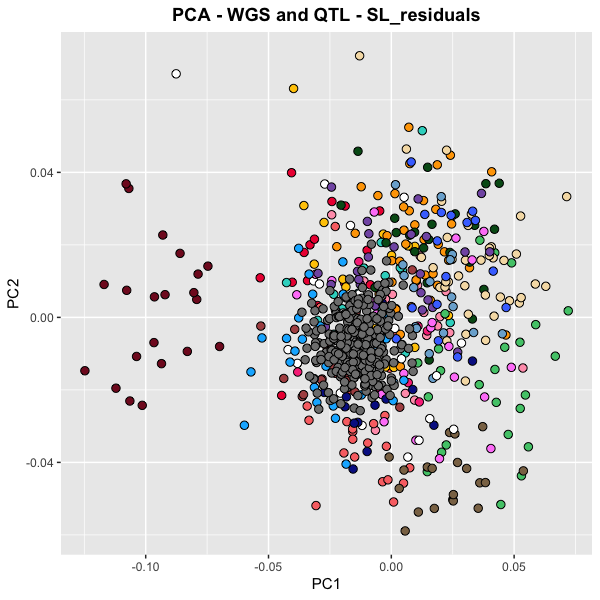

In [24]:
options(repr.plot.height=6, repr.plot.width=6, repr.plot.res=100)

ggplot(WGS_and_QTL.pca, aes(x=PC1,y=PC2, group=Group_short)) +
    geom_point(size=2.5, pch=21, fill=WGS_and_QTL.pca$Color_species, color="black") +
    ggtitle("PCA - WGS and QTL - SL_residuals") + theme(plot.title=element_text(face="bold",hjust=0.5))

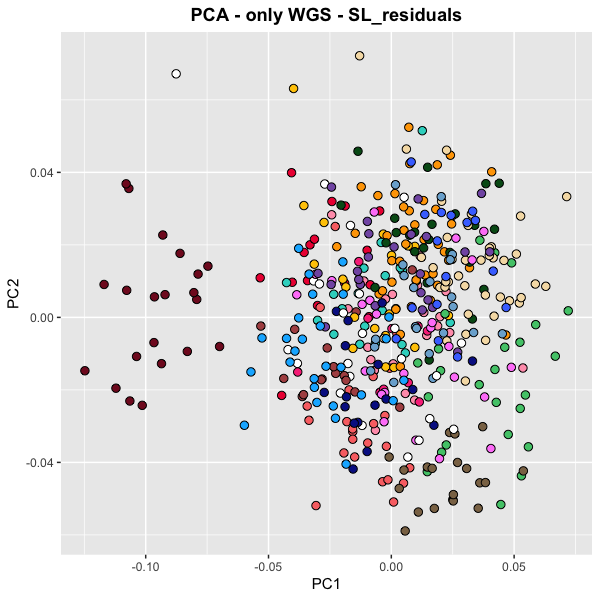

In [25]:
ggplot(only_WGS.pca, aes(x=PC1,y=PC2, group=Group_short)) +
    geom_point(size=2.5, pch=21, fill=only_WGS.pca$Color_species, color="black") + 
    ggtitle("PCA - only WGS - SL_residuals") + theme(plot.title=element_text(face="bold",hjust=0.5))

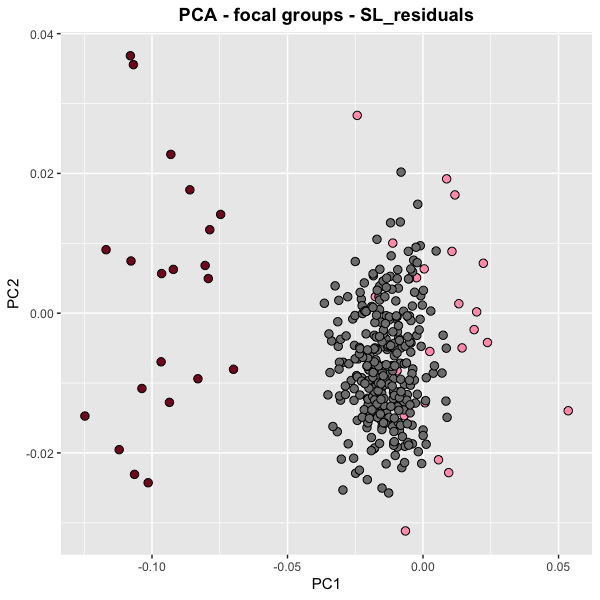

In [26]:
ggplot(focal.pca, aes(x=PC1,y=PC2, group=Group_short)) +
    geom_point(size=2.5, pch=21, fill=focal.pca$Color_species, color="black") +
    ggtitle("PCA - focal groups - SL_residuals") + theme(plot.title=element_text(face="bold",hjust=0.5))

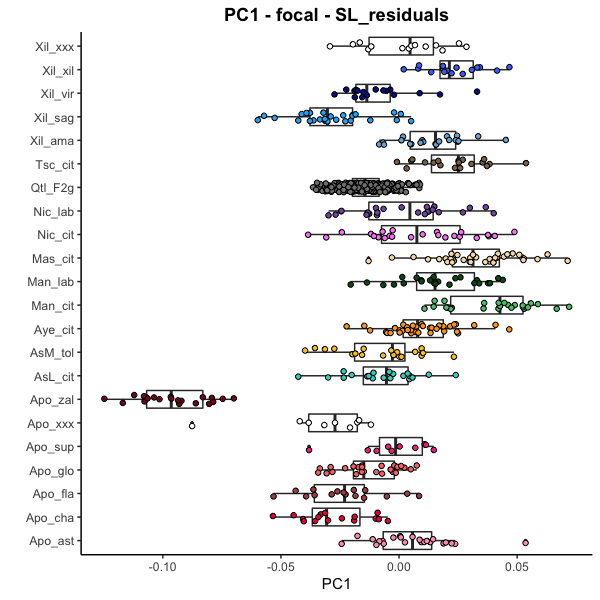

In [27]:
ggplot(WGS_and_QTL.pca, aes(x = Group_short, y= PC1)) +
  geom_boxplot(outlier.size = NULL)+ theme_classic()+
  geom_jitter(position = position_jitter(0.2), shape=21, fill=WGS_and_QTL.pca$Color_species ,color = "black") +
  theme(legend.position="none",axis.title.y = element_text(hjust = 0.5)) + 
  scale_y_continuous(name = "PC1") + scale_x_discrete(name = "")+ coord_flip() + 
  ggtitle("PC1 - focal - SL_residuals") + theme(plot.title=element_text(face="bold",hjust=0.5))

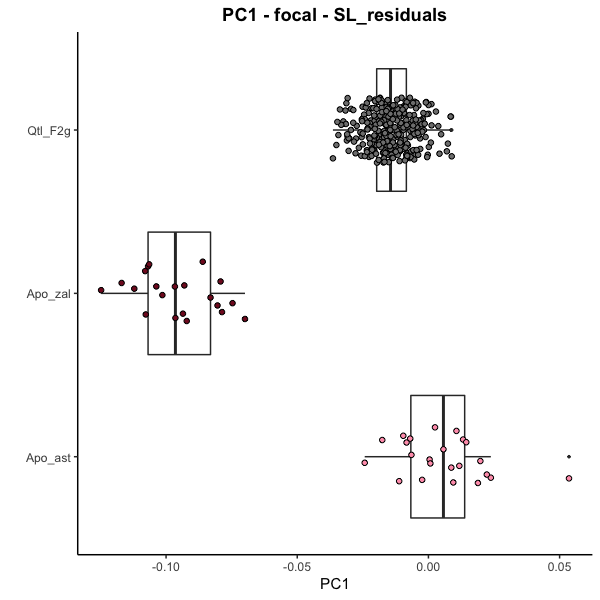

In [28]:
ggplot(focal.pca, aes(x = Group_short, y= PC1)) +
  geom_boxplot(outlier.size = NULL)+ theme_classic()+
  geom_jitter(position = position_jitter(0.2), shape=21, fill=focal.pca$Color_species ,color = "black") +
  theme(legend.position="none",axis.title.y = element_text(hjust = 0.5)) + 
  scale_y_continuous(name = "PC1") + scale_x_discrete(name = "")+ coord_flip() + 
  ggtitle("PC1 - focal - SL_residuals") + theme(plot.title=element_text(face="bold",hjust=0.5))

## Linear discriminant analyses

In [35]:
# pull out only Apo and Xil data
Apo.data <- only_WGS.pca %>% filter(str_detect(Group_short,"Apo")) %>% filter(Group_short!="Apo_xxx")
Xil.data <- only_WGS.pca %>% filter(str_detect(Group_short,"Xil")) %>% filter(Group_short!="Xil_xxx")

In [36]:
# perform linear discriminant analyses on first 30 PCs
Apo.lda <- lda(Apo.data$Group_short ~ ., data=Apo.data[4:33])
Xil.lda <- lda(Xil.data$Group_short ~ ., data=Xil.data[4:33])

In [37]:
# use predict function to get LD scores for all samples (will be in plda$x)
Apo.plda <- predict(object=Apo.lda, newdata=Apo.data[4:33])
Xil.plda <- predict(object=Xil.lda, newdata=Xil.data[4:33])

In [60]:
# write Morpho PC and lake-specific LD scores to file
out_file="sample_list_morpho_dat.csv"

if(!file.exists(out_file)){

    ApoXil.morphoLDs <- full_join(cbind(Apo.data[1],Apo.plda$x),cbind(Xil.data[1],Xil.plda$x)) %>%
        rename("Morhpo_LD1_Lake_Specific"=LD1,"Morhpo_LD2_Lake_Specific"=LD2,"Morhpo_LD3_Lake_Specific"=LD3,
               "Morhpo_LD4_Lake_Specific"=LD4,"Morhpo_LD5_Lake_Specific"=LD5)
     
    left_join(classifier %>% filter(Group_short!="Qtl_F2g"), WGS.morphoPCs, by="Sample_name") %>% 
        left_join(ApoXil.morphoLDs, by="Sample_name") %>% write_csv(out_file)
}

Joining, by = c("Sample_name", "LD1", "LD2", "LD3")


## t-SNE

In [38]:
# run t-SNE for CL Apoyo
set.seed(123)

Apo.tsne_data.2d <- Rtsne(Apo.plda$x, dims=2, initial_dims=10, perplexity=25, 
              theta=0.0, check_duplicates=T, pca=F, max_iter=1000,  
              verbose=F, is_distance=F, exaggeration_factor=1, 
              pca_center=T, pca_scale=T, 
              momentum=0.5, final_momentum=0.8, eta=200)

Apo.tsne_xy.2d <- as.data.frame(Apo.tsne_data.2d$Y); colnames(Apo.tsne_xy.2d) <- c("X","Y")
Apo.tsne_dat.2d <- cbind(Apo.tsne_xy.2d, Apo.data[1:2])

In [39]:
# run t-SNE for CL Xiloá
set.seed(123)

Xil.tsne_data.2d <- Rtsne(Xil.plda$x, dims=2, initial_dims=10, perplexity=25, 
              theta=0.0, check_duplicates=T, pca=F, max_iter=1000,  
              verbose=F, is_distance=F, exaggeration_factor=1, 
              pca_center=T, pca_scale=T, 
              momentum=0.5, final_momentum=0.8, eta=200)

Xil.tsne_xy.2d <- as.data.frame(Xil.tsne_data.2d$Y); colnames(Xil.tsne_xy.2d) <- c("X","Y")
Xil.tsne_dat.2d <- cbind(Xil.tsne_xy.2d, Xil.data[1:2])

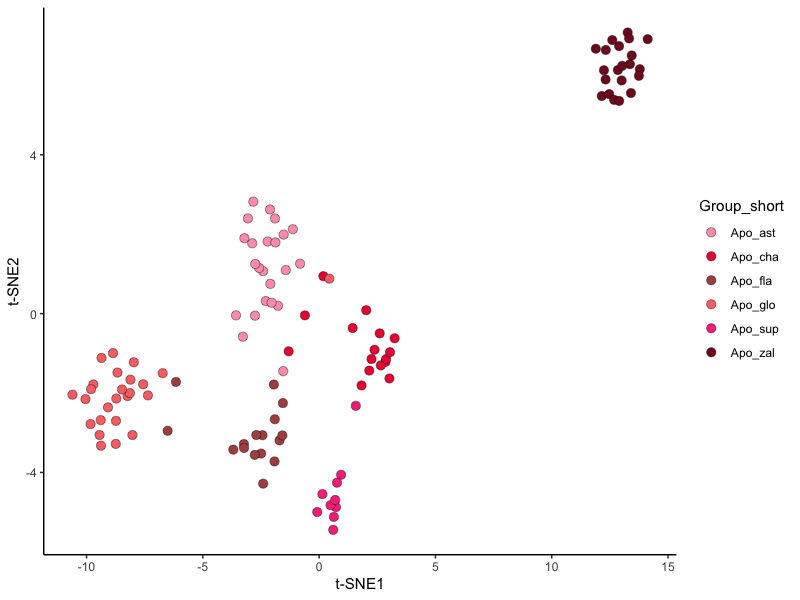

In [54]:
options(repr.plot.height=6,repr.plot.width=8)

#Apo.tsne_plot.2d <- 
ggplot(Apo.tsne_dat.2d, aes(X, Y, fill=Group_short, label=Sample_name)) +
    geom_point(size=3.0, stroke=0.2, pch=21) +
    xlab(paste0("t-SNE1")) +
    ylab(paste0("t-SNE2")) +
    scale_fill_manual(values=c("Apo_ast"="#FF9FB8","Apo_cha"="#ED1D40","Apo_fla"="#AF5151","Apo_glo"="#F97373",
        "Apo_sup"="#F93A88","Apo_zal"="#821426")) +
    theme_classic()

out_file="tSNE.Apo.LD.pdf"
if(!file.exists(out_file)){
    ggsave(out_file,width=8,height=6)
}

#ggplotly(Apo.tsne_plot.2d)

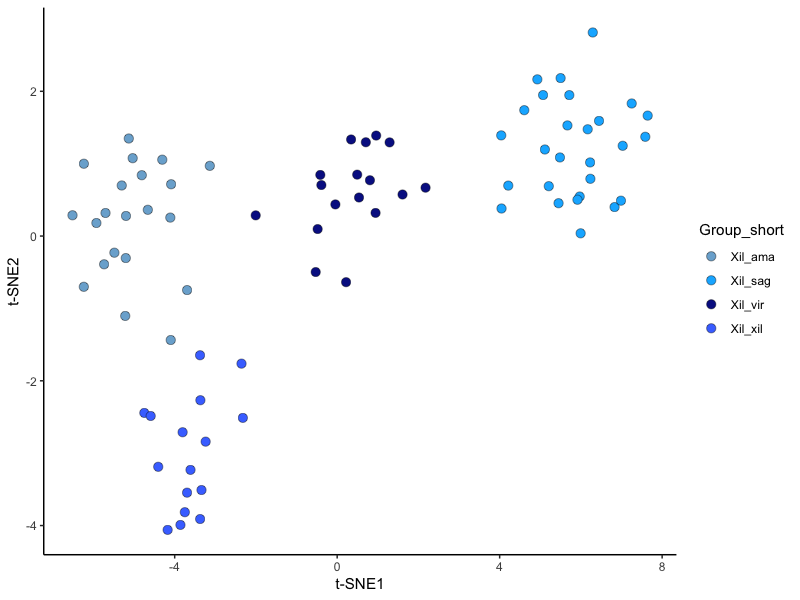

In [53]:
#Xil.tsne_plot.2d <- 
ggplot(Xil.tsne_dat.2d, aes(X, Y, fill=Group_short, label=Sample_name)) +
    geom_point(size=3.0, stroke=0.2, pch=21) +
    xlab(paste0("t-SNE1")) +
    ylab(paste0("t-SNE2")) +
    scale_fill_manual(values=c("Xil_ama"="#7BAFD4", "Xil_vir"="#091F92",
        "Xil_sag"="#0BB5FF", "Xil_xil"="#4876FF")) +
    theme_classic()

out_file="tSNE.Xil.LD.pdf"
if(!file.exists(out_file)){
    ggsave(out_file,width=8,height=6)
}

#ggplotly(Xil.tsne_plot.2d)